<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Bank_campaign_logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression
- Supervised Learning Algorithm
- Works with classification of data

In [ ]:
#Dataset Link: https://drive.google.com/file/d/1qU8m3UDk5QF5fJV_Zb8nBfdhQwiTFM29/view?usp=sharing

This dataset contains information related to bank direct marketing campaigns. It aims to predict whether a client will subscribe to a term deposit.



In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/bank-additional-full_final (3).csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
#null values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
#duplicate values
df.duplicated().sum()

np.int64(1784)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(39404, 20)

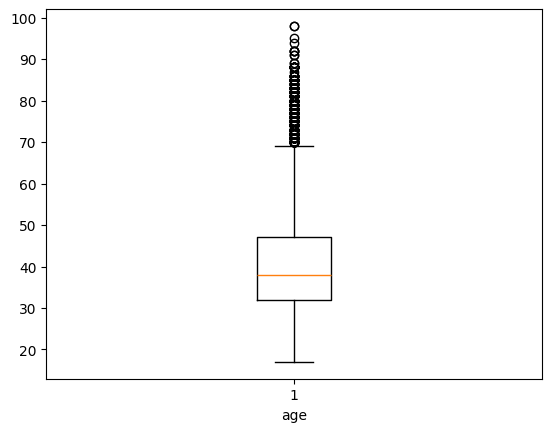

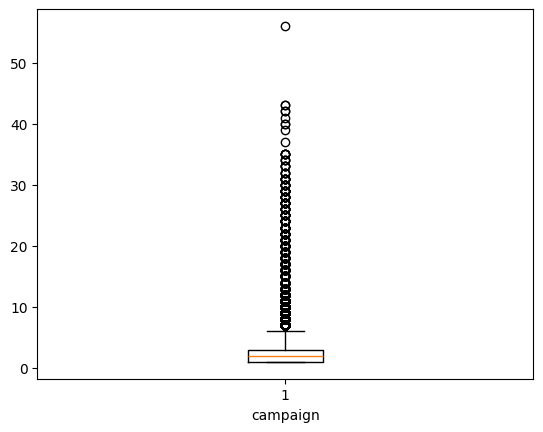

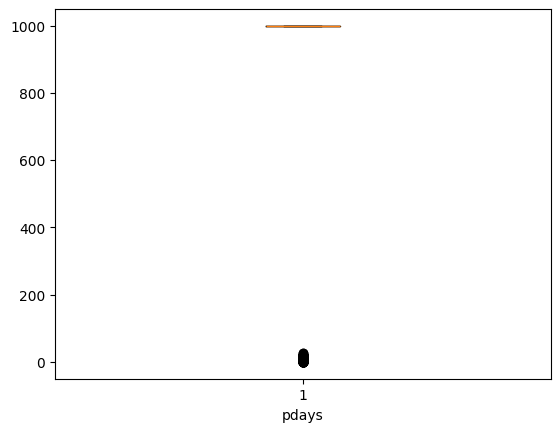

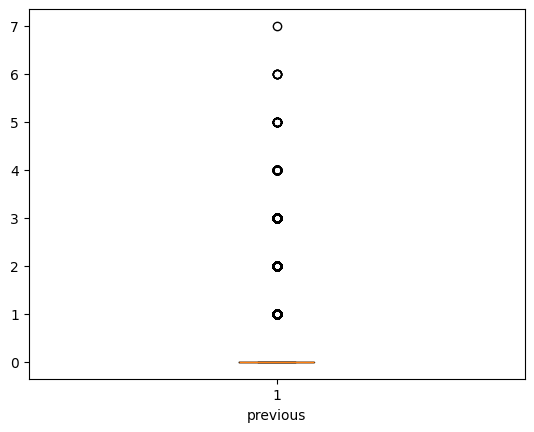

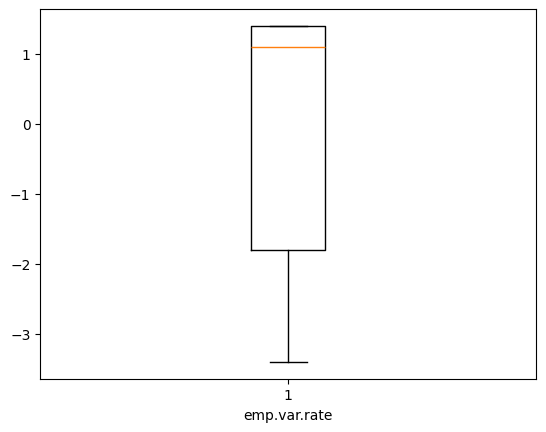

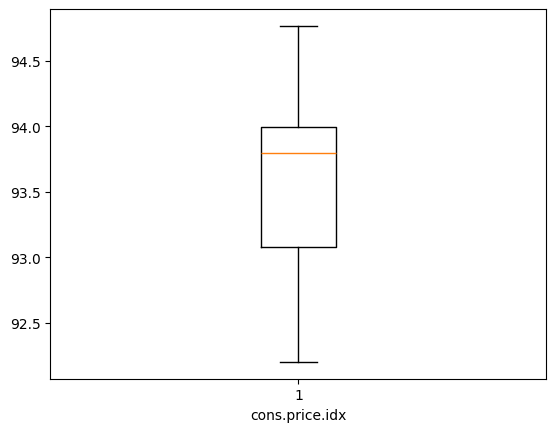

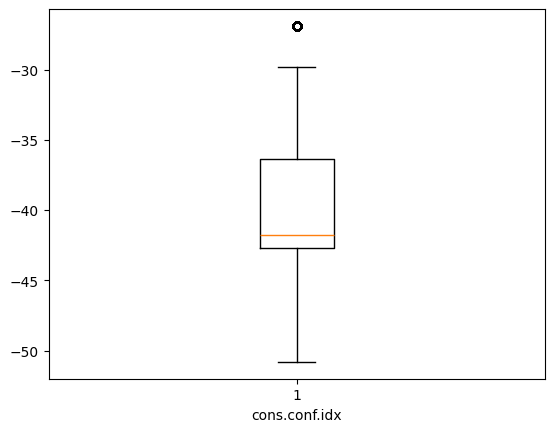

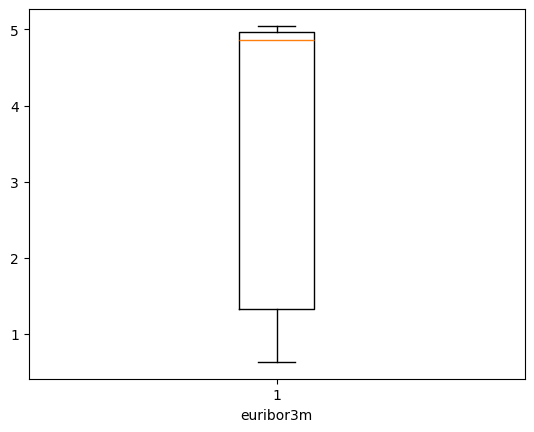

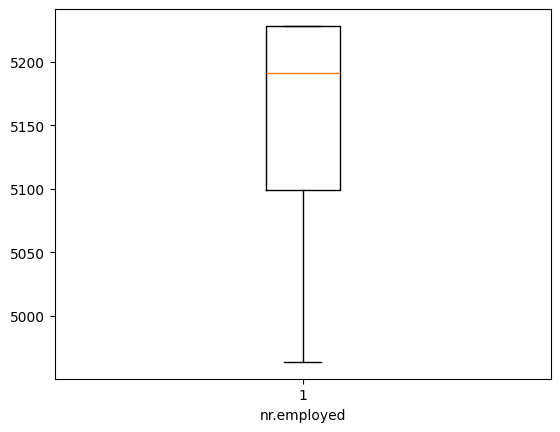

In [ ]:
#outlier visualisation

for col in df.columns:
  if (df[col].dtype != 'object'):
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
df['pdays'].value_counts()
#value_counts: gives the frequencyof a value

,count
pdays,
999,37890
3,438
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
#outlier removal
#Columns to avoid: 1. column without a box in the boxplot and 2. target variable

out_list=['age','campaign','cons.conf.idx']

for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR=Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]<=UB) & (df[col]>=LB)]

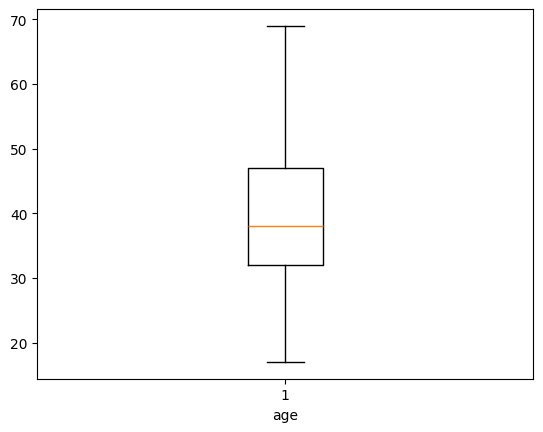

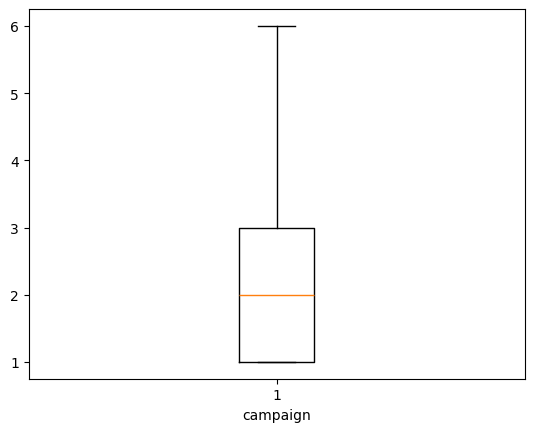

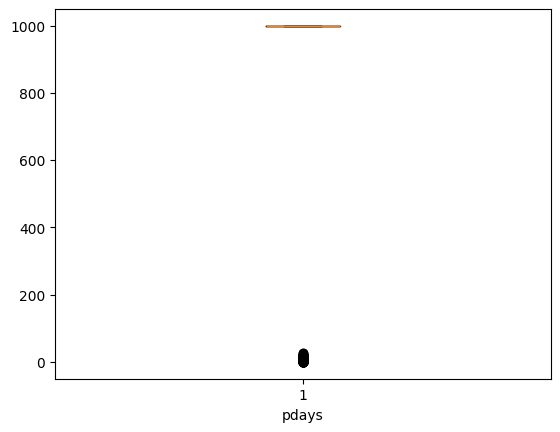

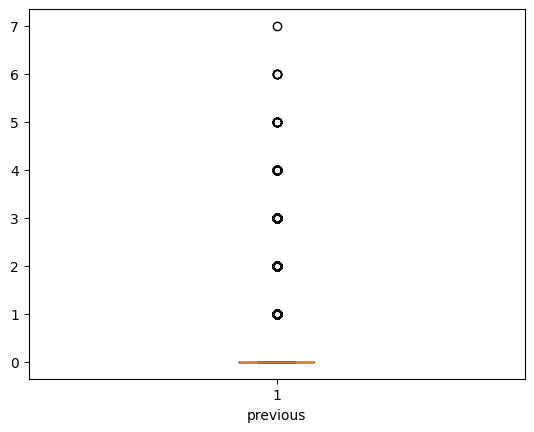

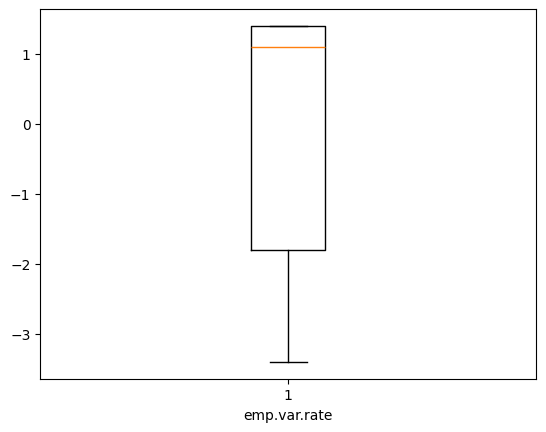

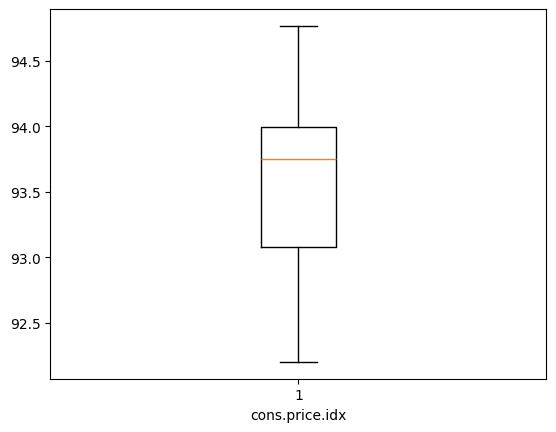

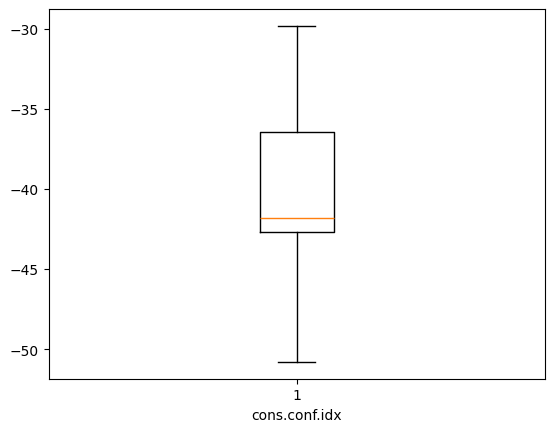

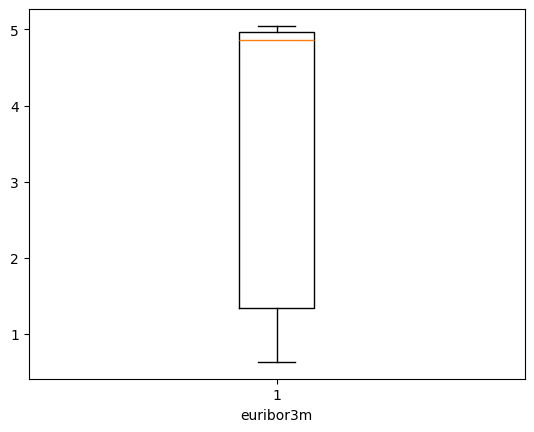

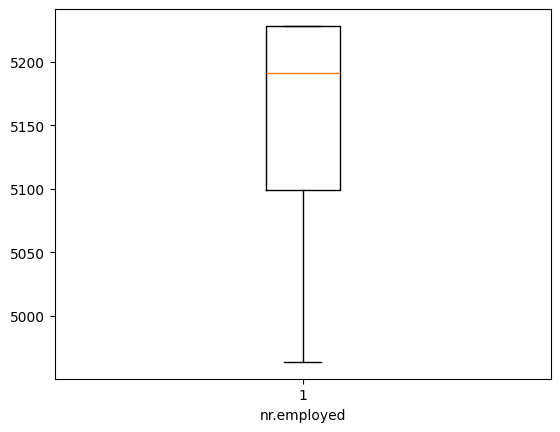

In [ ]:
#outlier visualisation

for col in df.columns:
  if (df[col].dtype != 'object'):
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
df.shape

(36178, 20)

In [ ]:
39404-36178

3226

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in df.columns:
  if (df[col].dtypes == 'object'):
    df[col] = LE.fit_transform(df[col])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
#Correlation

corr_mat=df.corr()
corr_mat

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.018506,-0.388425,-0.097211,0.188718,-0.001729,-0.009060,0.029388,-0.036293,-0.025109,0.005962,0.007390,-0.025933,0.019295,0.075228,0.037307,0.103288,0.086735,0.072747,-0.022390
job,-0.018506,1.000000,0.037164,0.142671,-0.026630,0.006002,-0.010860,-0.023837,-0.032415,-0.001641,-0.009357,-0.026749,0.019729,0.010517,-0.002252,-0.010256,0.046091,-0.002354,-0.012999,0.019792
marital,-0.388425,0.037164,1.000000,0.104102,-0.079582,0.009767,0.007514,-0.058513,-0.008818,0.005343,-0.008823,-0.051401,0.051673,0.004388,-0.101943,-0.060699,-0.033939,-0.110612,-0.110196,0.058802
education,-0.097211,0.142671,0.104102,1.000000,-0.192025,0.014668,0.005004,-0.108438,-0.081262,-0.019656,-0.002219,-0.060958,0.050608,0.020244,-0.062420,-0.085735,0.083066,-0.055083,-0.065208,0.071045
default,0.188718,-0.026630,-0.079582,-0.192025,1.000000,-0.016202,-0.004329,0.134633,-0.010791,-0.006992,0.026083,0.084148,-0.105211,0.021705,0.202589,0.159868,0.046232,0.194718,0.190468,-0.099809
housing,-0.001729,0.006002,0.009767,0.014668,-0.016202,1.000000,0.046522,-0.080323,-0.020244,-0.001833,-0.007063,-0.011997,0.024950,-0.012626,-0.062627,-0.081238,-0.034464,-0.060621,-0.047404,0.012587
loan,-0.009060,-0.010860,0.007514,0.005004,-0.004329,0.046522,1.000000,-0.013360,-0.007946,-0.007160,0.004584,0.003474,-0.005205,-0.000405,0.005342,-0.003723,-0.009031,0.003755,0.007860,-0.007853
contact,0.029388,-0.023837,-0.058513,-0.108438,0.134633,-0.080323,-0.013360,1.000000,0.285346,-0.005089,0.033025,0.120477,-0.221583,0.126426,0.411964,0.603740,0.299958,0.415225,0.279048,-0.148016
month,-0.036293,-0.032415,-0.008818,-0.081262,-0.010791,-0.020244,-0.007946,0.285346,1.000000,0.035691,-0.043945,-0.033845,0.088171,-0.062412,-0.124333,0.037617,-0.030525,-0.069672,-0.173646,-0.028549
day_of_week,-0.025109,-0.001641,0.005343,-0.019656,-0.006992,-0.001833,-0.007160,-0.005089,0.035691,1.000000,-0.049757,-0.011359,-0.003125,0.018630,0.035314,0.008291,0.045487,0.041011,0.029958,0.016365


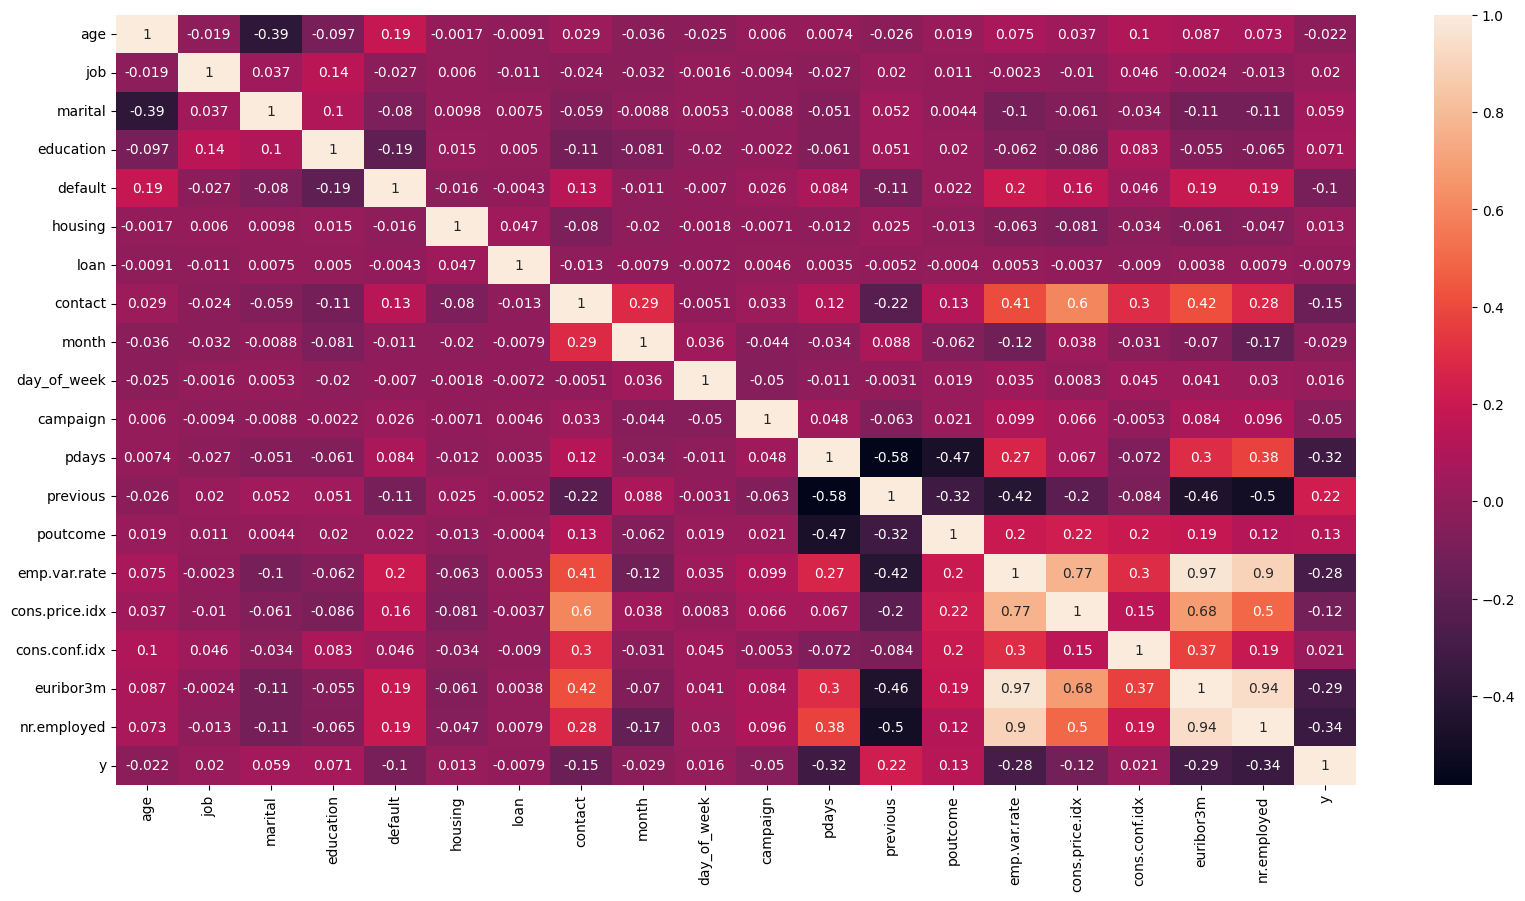

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [ ]:
#VIF : Variance Inflation Factor
#calculates the multicollinearity between columns and drops the column with the highest values

In [ ]:
x=df.drop('y',axis=1) #features
y=df['y']

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41181,1
41182,0
41184,0
41185,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_df=pd.DataFrame()

In [ ]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
vif_df['Features']=x.columns
vif_df

,Features
0,age
1,job
2,marital
3,education
4,default
5,housing
6,loan
7,contact
8,month
9,day_of_week


In [ ]:
#For every column in x, calculate how strongly it is related to the other columns and put that number
#in the Multicollinearity column of vif_df

vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,age,21.966070
1,job,2.114551
2,marital,5.649477
3,education,4.533743
4,default,1.413486
5,housing,2.200634
6,loan,1.217609
7,contact,2.935270
8,month,6.604837
9,day_of_week,3.084861


In [ ]:
x.drop('nr.employed',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,age,21.958629
1,job,2.114409
2,marital,5.648510
3,education,4.531664
4,default,1.410297
5,housing,2.200178
6,loan,1.217517
7,contact,2.468746
8,month,5.711382
9,day_of_week,3.084226


In [ ]:
x.drop('cons.price.idx',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,age,20.768073
1,job,2.108771
2,marital,5.496358
3,education,4.476751
4,default,1.410286
5,housing,2.198755
6,loan,1.217080
7,contact,2.371250
8,month,5.669544
9,day_of_week,3.066477


In [ ]:
x.drop('pdays',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,age,19.894134
1,job,2.105691
2,marital,5.379182
3,education,4.426096
4,default,1.410241
5,housing,2.195607
6,loan,1.216909
7,contact,2.301345
8,month,5.625194
9,day_of_week,3.053601


In [ ]:
x.drop('euribor3m',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,age,16.983749
1,job,2.099141
2,marital,5.187809
3,education,4.277073
4,default,1.409908
5,housing,2.187525
6,loan,1.216483
7,contact,2.289988
8,month,5.248013
9,day_of_week,3.012393


In [ ]:
x.drop('cons.conf.idx',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,age,10.519901
1,job,2.089816
2,marital,4.300933
3,education,4.177050
4,default,1.409069
5,housing,2.152500
6,loan,1.212707
7,contact,2.268380
8,month,4.850603
9,day_of_week,2.943193


In [ ]:
x.drop('age',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,job,2.065035
1,marital,4.291795
2,education,3.979094
3,default,1.322478
4,housing,2.097685
5,loan,1.209040
6,contact,2.266805
7,month,4.548502
8,day_of_week,2.842802
9,campaign,3.217133


In [ ]:
x.drop('poutcome',axis=1, inplace=True)

In [ ]:
vif_df=pd.DataFrame()
vif_df['Features']=x.columns
vif_df['Multicollinearity']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,Features,Multicollinearity
0,job,2.042861
1,marital,4.034238
2,education,3.721585
3,default,1.310552
4,housing,2.059338
5,loan,1.206251
6,contact,2.248569
7,month,4.390682
8,day_of_week,2.732719
9,campaign,3.071028


In [ ]:
#MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
x_train

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,emp.var.rate
36297,0,2,6,0,0,0,0,4,1,1,0,-2.9
19009,0,1,3,0,2,2,0,1,3,1,0,1.4
14505,7,2,6,0,0,0,0,3,3,4,0,1.4
25729,6,1,2,0,0,0,0,7,4,1,0,-0.1
35159,7,2,3,1,0,0,0,6,0,5,0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4652,0,2,6,0,2,2,1,6,4,1,0,1.1
6335,1,1,2,1,0,0,1,6,3,3,0,1.1
27574,0,2,6,0,0,0,0,7,0,3,0,-0.1
39803,0,0,3,0,0,0,0,4,4,1,1,-1.7


In [ ]:
y_train

,y
36297,1
19009,0
14505,0
25729,0
35159,0
...,...
4652,1
6335,0
27574,0
39803,1


In [ ]:
x_test

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,emp.var.rate
19769,9,1,3,1,0,0,0,1,0,1,0,1.4
40795,6,2,6,0,2,0,0,9,2,1,0,-1.1
25355,4,1,3,1,0,0,0,7,3,2,0,-0.1
6834,5,0,0,1,0,0,1,6,4,2,0,1.1
35558,1,2,2,0,0,0,0,6,1,1,0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...
28589,0,1,6,0,2,0,0,0,4,1,0,-1.8
33335,1,2,0,0,0,0,0,6,3,1,0,-1.8
20459,9,1,3,0,0,0,0,1,3,2,0,1.4
12581,2,1,2,1,2,0,0,3,1,1,0,1.4


In [ ]:
y_test

,y
19769,0
40795,0
25355,0
6834,0
35558,0
...,...
28589,1
33335,0
20459,0
12581,0


In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[9602,   26],
       [1184,   42]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94      9628\n           1       0.62      0.03      0.06      1226\n\n    accuracy                           0.89     10854\n   macro avg       0.75      0.52      0.50     10854\nweighted avg       0.86      0.89      0.84     10854\n'

In [ ]:
TN = cf[0,0]
FP = cf[0,1]
FN = cf[1,0]
TP = cf[1,1]

# Calculate metrics for Class 0
Precision_0 = TN / (TN + FN)
Recall_0 = TN / (TN + FP)
F1_0 = 2 * (Precision_0 * Recall_0) / (Precision_0 + Recall_0)

# Calculate metrics for Class 1
Precision_1 = TP / (TP + FP) #Precision: Of all predicted positives, how many are actually positive?
Recall_1 = TP / (TP + FN) # Recall: Of all actual positives, how many are correctly predicted?
F1_1 = 2 * (Precision_1 * Recall_1) / (Precision_1 + Recall_1) #Harmonic mean of precision and recall, balancing the two when both matter.

print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'True Positives (TP): {TP}')
print('\n')
print(f'Precision for Class 0: {Precision_0:.4f}')
print(f'Recall for Class 0: {Recall_0:.4f}')
print(f'F1-score for Class 0: {F1_0:.4f}')
print('\n')
print(f'Precision for Class 1: {Precision_1:.4f}')
print(f'Recall for Class 1: {Recall_1:.4f}')
print(f'F1-score for Class 1: {F1_1:.4f}')
print('\n')
print(f'Overall Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')

True Negatives (TN): 9602
False Positives (FP): 26
False Negatives (FN): 1184
True Positives (TP): 42


Precision for Class 0: 0.8902
Recall for Class 0: 0.9973
F1-score for Class 0: 0.9407


Precision for Class 1: 0.6176
Recall for Class 1: 0.0343
F1-score for Class 1: 0.0649


Overall Accuracy: 88.85%


### Summary:

- The model’s overall accuracy is high at 88.85%, but this doesn’t tell the full story.

- It predicts the majority class (Class 0) very well:
  - Correctly identifies almost all Class 0 cases (99.73% recall).
  - Has good precision (89%) for Class 0 predictions.
  - Balanced performance reflected in a strong F1-score (94%).
- The model struggles a lot with the minority class (Class 1):
  - It only finds about 3.4% of actual Class 1 cases (very low recall).
  - When it predicts Class 1, it’s right about 62% of the time (moderate precision).
  - Overall, the F1-score for Class 1 is very low (around 6.5%), showing the model rarely identifies these cases well.
- The imbalance in data causes the model to mostly guess Class 0, missing many important Class 1 cases.

# Next steps

- So, while accuracy looks good, it’s misleading because the model fails to detect most minority class examples.
- To improve this, we need techniques like balancing the data or using models better designed for imbalanced cases. or exploring alternative classification algorithms.
